# Лабораторная 4

In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg','pdf')

In [2]:
from scipy.stats import norm, cauchy, laplace, poisson, uniform
import numpy as np
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import codecs
import csv
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
sns.set_style('whitegrid')

In [4]:
units = [20, 60, 100]
cont_segment = (-4, 4)
discr_segment = (6, 14)
bw_adjust_coefs = [.5, 1, 2]

In [5]:
def bw_title(n, factor):
    if factor == .5:
        return r'$h=0.5h_{' + str(n) + r'}$'
    if factor == 1:
        return r'$h=h_{' + str(n) + r'}$'
    else:
        return r'$h=2 h_{' + str(n) + r'}$'

In [6]:
def get_truncated_sample(segment, distribution, sample_size):
    sample = []
    while len(sample) < sample_size:
        to_add = list(distribution.rvs(size=sample_size - len(sample)))
        to_add = [x for x in to_add if x>=segment[0] and x<=segment[1]]
        sample = sample + to_add
    return sample

Выборочный квартиль $z_p$ порядка $p$ $\left(\displaystyle z_p = \begin{cases}\label{pqv}
        \displaystyle\;\;x_{([np]+1)}&\text{при}\;\;np\;\text{дробном,}\\
        \displaystyle\;\;\;\;\;x_{(np)}&\text{при}\;\;np\;\text{целом}
        \end{cases}\right)$:

In [7]:
def z_p(variational_series, p):
    pn = p * variational_series.size
    if (pn == int(pn)):
        return variational_series[int(pn)]
    return variational_series[int(pn) + 1]

Нормальное распределение $\left(f(x)=\displaystyle\frac{e^{-x^2/2}}{\sqrt{2\pi}}\right)$:

Э. Ф. Р. :

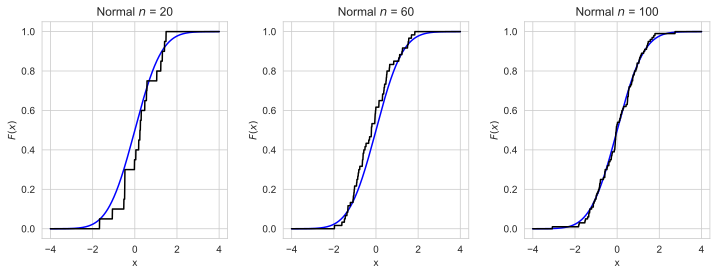

In [52]:
ecdf_fig, axs = plt.subplots(ncols=len(units), figsize=(12,4))
x = np.linspace(cont_segment[0], cont_segment[1], 1000)
y = norm.cdf(x)
for i in range(len(units)):
    axs[i].plot(x,y, color='blue')
    ecdf = ECDF(norm.rvs(size=units[i]))
    axs[i].plot(x,ecdf(x), color='black')
    axs[i].set(xlabel='x', ylabel = "$F(x)$")
    axs[i].set_title(r"Normal $n$ = " + str(units[i]))
ecdf_fig.subplots_adjust(wspace=0.3)
ecdf_fig.savefig("normalECDF.pdf")

Ядерные оценки:

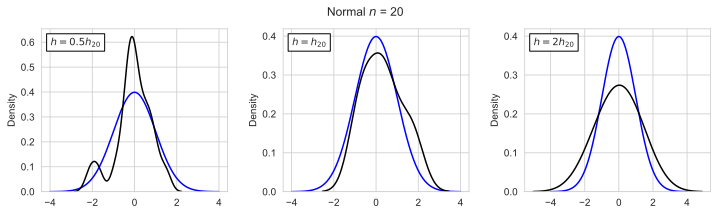

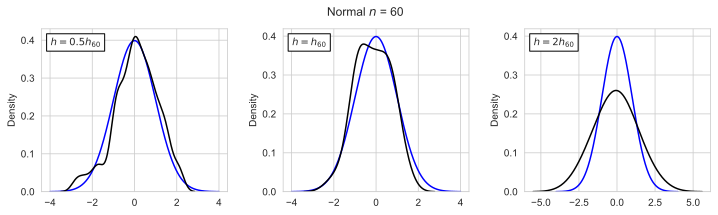

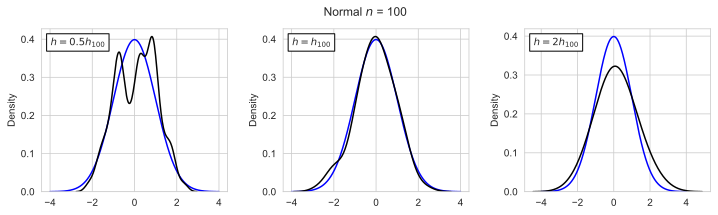

In [138]:
x = np.linspace(cont_segment[0], cont_segment[1], 1000)
y = norm.pdf(x)
for i in range(len(units)):
    kernel_fig, axs = plt.subplots(ncols=len(bw_adjust_coefs), figsize=(12,3))
    for j in range(len(bw_adjust_coefs)):
        axs[j].plot(x, y, color='blue')
        sns.kdeplot(data=norm.rvs(size=units[i]), bw_method='silverman', bw_adjust=bw_adjust_coefs[j], ax=axs[j], color='black')
        axs[j].add_artist(AnchoredText(bw_title(units[i], bw_adjust_coefs[j]),loc=2))
    kernel_fig.suptitle(r'Normal $n$ = ' + str(units[i]))
    kernel_fig.subplots_adjust(wspace=0.3)
    kernel_fig.savefig("normalKde" + str(units[i]) + ".pdf")

Распределение Коши $\left(f(x)=\displaystyle\frac{1}{\pi}\frac{1}{x^2+1}\right)$:

Э. Ф. Р. :

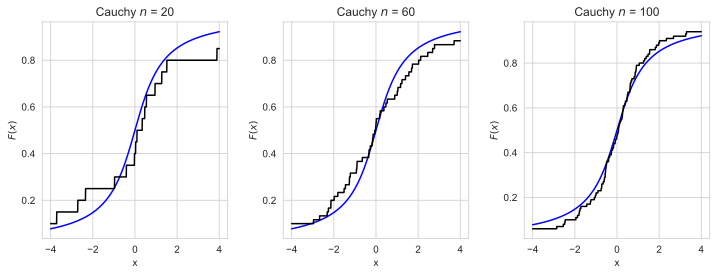

In [60]:
ecdf_fig, axs = plt.subplots(ncols=len(units), figsize=(12,4))
x = np.linspace(cont_segment[0], cont_segment[1], 1000)
y = cauchy.cdf(x)
for i in range(len(units)):
    axs[i].plot(x,y, color='blue')
    ecdf = ECDF(cauchy.rvs(size=units[i]))
    axs[i].plot(x,ecdf(x), color='black')
    axs[i].set(xlabel='x', ylabel = "$F(x)$")
    axs[i].set_title(r"Cauchy $n$ = " + str(units[i]))
ecdf_fig.subplots_adjust(wspace=0.3)
ecdf_fig.savefig("cauchyECDF.pdf")

Ядерные оценки:

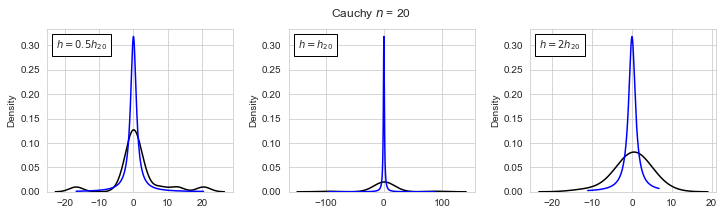

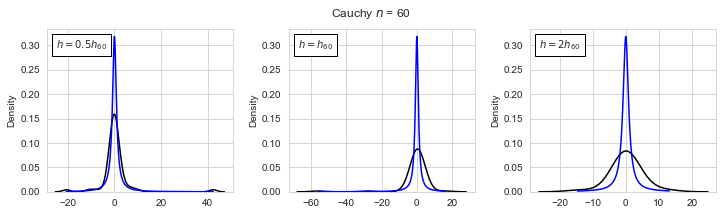

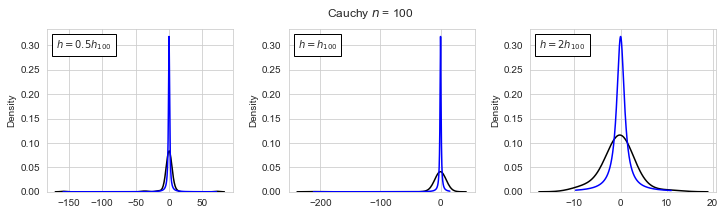

In [25]:
#x = np.linspace(cont_segment[0], cont_segment[1], 10000)
#y = cauchy.pdf(x)
for i in range(len(units)):
    kernel_fig, axs = plt.subplots(ncols=len(bw_adjust_coefs), figsize=(12,3))
    for j in range(len(bw_adjust_coefs)):
        sample = cauchy.rvs(size=units[i])
        sample.sort()
        x = np.linspace(min(min(sample),cont_segment[0]),max(max(sample),cont_segment[1]), 10000)
        y = cauchy.pdf(x)
        Q_1 = z_p(sample, 1/4)
        Q_3 = z_p(sample, 3/4)
        X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
        X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
        sample_truncated = [x for x in sample if x >= X_1 and x <= X_2]
        sns.kdeplot(data=sample, bw_method='silverman',
                    bw_adjust=bw_adjust_coefs[j], ax=axs[j], color='black')
        #axs[j].set_xlim(cont_segment)
        axs[j].add_artist(AnchoredText(bw_title(units[i], bw_adjust_coefs[j]),loc=2))
        axs[j].plot(x, y, color='blue')
    kernel_fig.suptitle(r'Cauchy $n$ = ' + str(units[i]))
    kernel_fig.subplots_adjust(wspace=0.3)
    kernel_fig.savefig("cauchyKde" + str(units[i]) + ".pdf")

In [21]:
sample1 = cauchy.rvs(size=11)
print(sample1)
sample1 = sample + [1]
print(sample1)

[-1.78123285 -1.72732746  1.49778079  0.6795006  -0.48974177  1.44798004
  2.57800765 -6.65899707  0.13022497  3.42469891 -0.83411141]
[-2.21970475e+02 -7.38072937e+00 -7.22366921e+00 -6.75786125e+00
 -6.29797343e+00 -3.87654719e+00 -3.10626511e+00 -3.03253210e+00
 -3.01567502e+00 -2.96333915e+00 -2.77098871e+00 -2.08249425e+00
 -1.68877783e+00 -1.50376696e+00 -1.43519256e+00 -1.36942810e+00
 -1.21102485e+00 -1.04154881e+00 -1.02042304e+00 -8.11817969e-01
 -7.25552387e-01 -7.02909121e-01 -5.78721996e-01 -5.54674699e-01
 -5.50984231e-01 -5.29854941e-01 -5.21835372e-01 -5.05844646e-01
 -5.02452747e-01 -3.93016716e-01 -3.56999482e-01 -3.06170679e-01
 -2.04999854e-01 -2.03798817e-01 -1.59353213e-01 -1.23752926e-01
  7.73668619e-02  1.82136821e-01  1.90701641e-01  2.38083231e-01
  3.55844644e-01  3.96353664e-01  3.98856237e-01  4.17093610e-01
  4.26784906e-01  5.28124493e-01  5.97703828e-01  6.67699482e-01
  6.94526275e-01  7.12435122e-01  7.69368091e-01  8.33417210e-01
  1.02378213e+00  1.

Распределение Лапласа $\left(f(x)=\displaystyle\frac{1}{\sqrt{2}}e^{-\sqrt{2}|x|}\right)$:

Э. Ф. Р. :

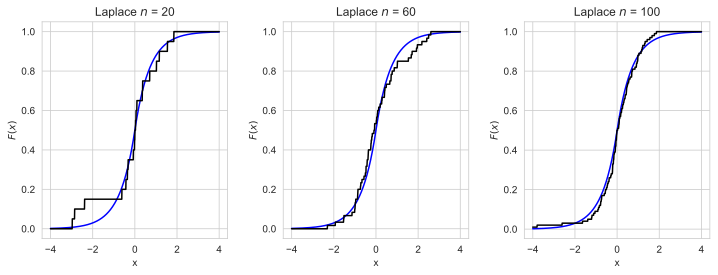

In [70]:
ecdf_fig, axs = plt.subplots(ncols=len(units), figsize=(12,4))
x = np.linspace(cont_segment[0], cont_segment[1], 1000)
y = laplace(scale=2 ** (-0.5), loc=0).cdf(x)
for i in range(len(units)):
    axs[i].plot(x,y, color='blue')
    ecdf = ECDF(laplace.rvs(scale=2 ** (-0.5), loc=0, size=units[i]))
    axs[i].plot(x,ecdf(x), color='black')
    axs[i].set(xlabel='x', ylabel = "$F(x)$")
    axs[i].set_title(r"Laplace $n$ = " + str(units[i]))
ecdf_fig.subplots_adjust(wspace=0.3)
ecdf_fig.savefig("laplaceECDF.pdf")

Ядерные оценки:

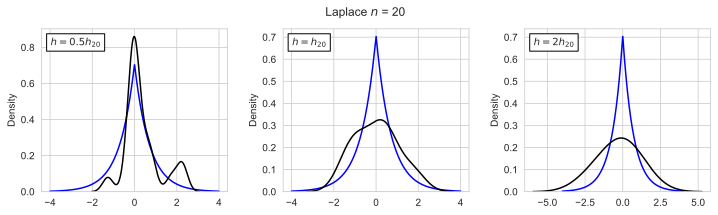

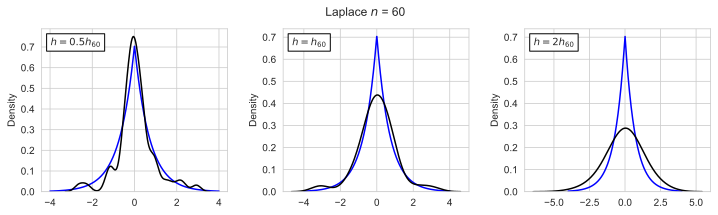

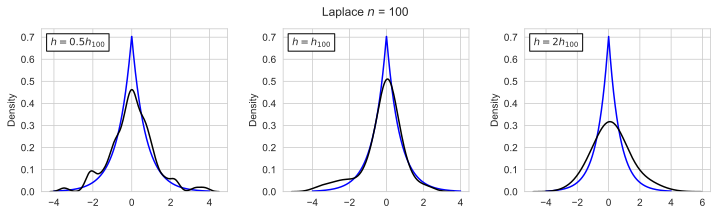

In [151]:
x = np.linspace(cont_segment[0], cont_segment[1], 1000)
y = laplace(scale=2 ** (-0.5), loc=0).pdf(x)
for i in range(len(units)):
    kernel_fig, axs = plt.subplots(ncols=len(bw_adjust_coefs), figsize=(12,3))
    for j in range(len(bw_adjust_coefs)):
        axs[j].plot(x, y, color='blue')
        sns.kdeplot(data=laplace.rvs(scale=2 ** (-0.5), loc=0,size=units[i]), bw_method='silverman', bw_adjust=bw_adjust_coefs[j], ax=axs[j], color='black')
        axs[j].add_artist(AnchoredText(bw_title(units[i], bw_adjust_coefs[j]),loc=2))
    kernel_fig.suptitle(r'Laplace $n$ = ' + str(units[i]))
    kernel_fig.subplots_adjust(wspace=0.3)
    kernel_fig.savefig("laplaceKde" + str(units[i]) + ".pdf")

Распределение Пуассона $\left(p(k)=\displaystyle\frac{10^k}{k!}e^{-10}\right)$:

Э. Ф. Р. :

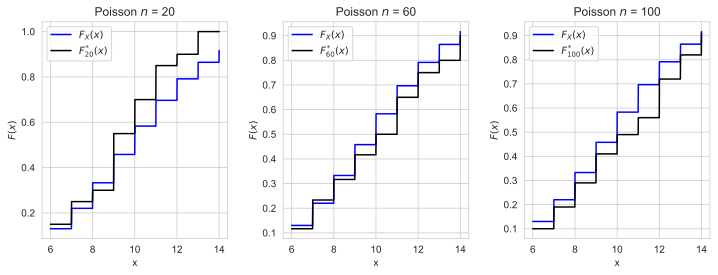

In [92]:
ecdf_fig, axs = plt.subplots(ncols=len(units), figsize=(12,4))
x = np.linspace(discr_segment[0], discr_segment[1], 1000)
y = poisson(10).cdf(x)
for i in range(len(units)):
    line1, = axs[i].plot(x,y, color='blue')
    ecdf = ECDF(poisson.rvs(10, size=units[i]))
    line2, = axs[i].plot(x,ecdf(x), color='black')
    axs[i].set(xlabel='x', ylabel = "$F(x)$")
    axs[i].set_title(r"Poisson $n$ = " + str(units[i]))
    axs[i].legend((line1, line2),(r"$F_X(x)$",r'$F_{'+ str(units[i]) + r'}^{*}(x)$'))
ecdf_fig.subplots_adjust(wspace=0.3)
ecdf_fig.savefig("poissonECDF.pdf")

Ядерные оценки:

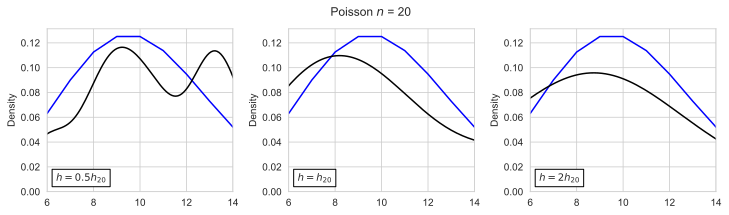

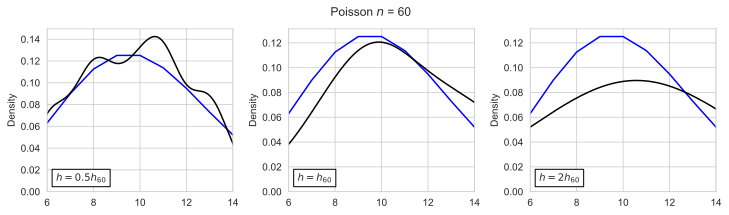

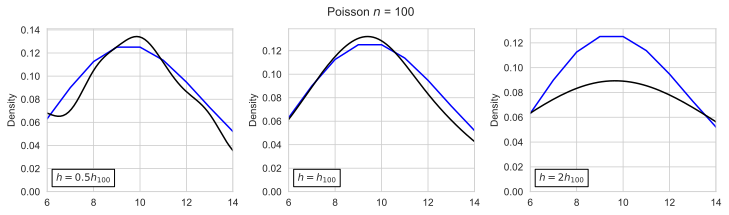

In [161]:
x = np.linspace(discr_segment[0], discr_segment[1], discr_segment[1] - discr_segment[0] + 1)
y = poisson(10).pmf(x)
for i in range(len(units)):
    kernel_fig, axs = plt.subplots(ncols=len(bw_adjust_coefs), figsize=(12,3))
    for j in range(len(bw_adjust_coefs)):
        axs[j].plot(x, y, color='blue')
        sns.kdeplot(data=poisson.rvs(10, size=units[i]), bw_method='silverman', bw_adjust=bw_adjust_coefs[j], ax=axs[j], color='black')
        axs[j].add_artist(AnchoredText(bw_title(units[i], bw_adjust_coefs[j]),loc=3))
        axs[j].set_xlim(discr_segment)
    kernel_fig.suptitle(r'Poisson $n$ = ' + str(units[i]))
    kernel_fig.subplots_adjust(wspace=0.3)
    kernel_fig.savefig("poisKde" + str(units[i]) + ".pdf")

Равномерное распределение $\left(f(x)=\begin{cases}
        \displaystyle\frac{1}{2\sqrt{3}}&\text{при}\;\;|x|\:\leq\sqrt{3}\\
        \;\;\;0&\text{при}\;\;|x|\:>\sqrt{3}\\
        \end{cases}\right)$:

Э. Ф. Р. :

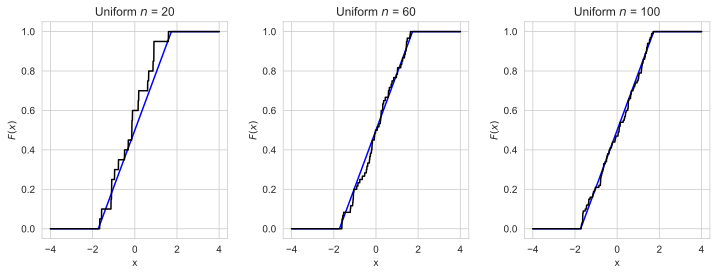

In [74]:
ecdf_fig, axs = plt.subplots(ncols=len(units), figsize=(12,4))
x = np.linspace(cont_segment[0], cont_segment[1], 1000)
y = uniform(loc=-3**0.5, scale=2*3**0.5).cdf(x)
for i in range(len(units)):
    axs[i].plot(x,y, color='blue')
    ecdf = ECDF(uniform.rvs(loc=-3**0.5, scale=2*3**0.5, size=units[i]))
    axs[i].plot(x,ecdf(x), color='black')
    axs[i].set(xlabel='x', ylabel = "$F(x)$")
    axs[i].set_title(r"Uniform $n$ = " + str(units[i]))
ecdf_fig.subplots_adjust(wspace=0.3)
ecdf_fig.savefig("uniformECDF.pdf")

Ядерные оценки:

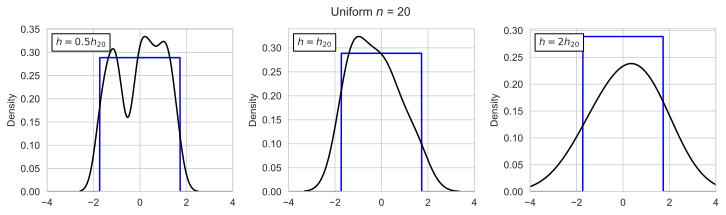

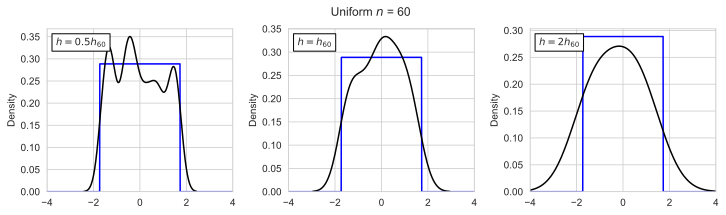

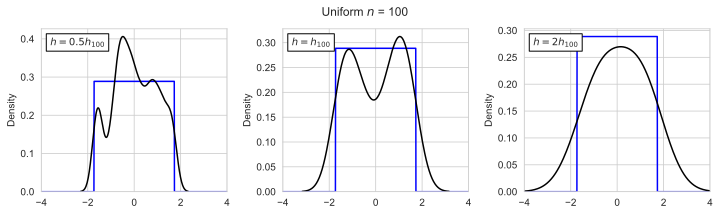

In [155]:
x = np.linspace(cont_segment[0], cont_segment[1], 1000)
y = uniform(loc=-3**0.5, scale=2*3**0.5).pdf(x)
for i in range(len(units)):
    kernel_fig, axs = plt.subplots(ncols=len(bw_adjust_coefs), figsize=(12,3))
    for j in range(len(bw_adjust_coefs)):
        axs[j].plot(x, y, color='blue')
        sns.kdeplot(data=uniform.rvs(loc=-3**0.5, scale=2*3**0.5, size=units[i]), bw_method='silverman', bw_adjust=bw_adjust_coefs[j], ax=axs[j], color='black')
        axs[j].add_artist(AnchoredText(bw_title(units[i], bw_adjust_coefs[j]),loc=2))
        axs[j].set_xlim(cont_segment)
    kernel_fig.suptitle(r'Uniform $n$ = ' + str(units[i]))
    kernel_fig.subplots_adjust(wspace=0.3)
    kernel_fig.savefig("unifKde" + str(units[i]) + ".pdf")